In [1]:
import torch 
import torchvision
import matplotlib.pyplot as plt
import numpy as np

%load_ext autoreload
%autoreload 2

In [1]:
import project

project.models.util_layers.gaussian_kernel(3, 1.0)


array([[0.07511361, 0.1238414 , 0.07511361],
       [0.1238414 , 0.20417996, 0.1238414 ],
       [0.07511361, 0.1238414 , 0.07511361]], dtype=float32)

In [10]:
import numpy as np
np.geomspace(4, 24, 4, dtype=np.int32)


array([ 4,  7, 13, 24], dtype=int32)

In [4]:
#load emnest dataset
mnest_train = torchvision.datasets.EMNIST(root='./data', split='digits', train=True, download=True, transform=None)
mnest_test = torchvision.datasets.EMNIST(root='./data', split='digits', train=False, download=True, transform=None)



len of mnest train: 240000
len of mnest test: 40000
image_train.shape: (28, 28)


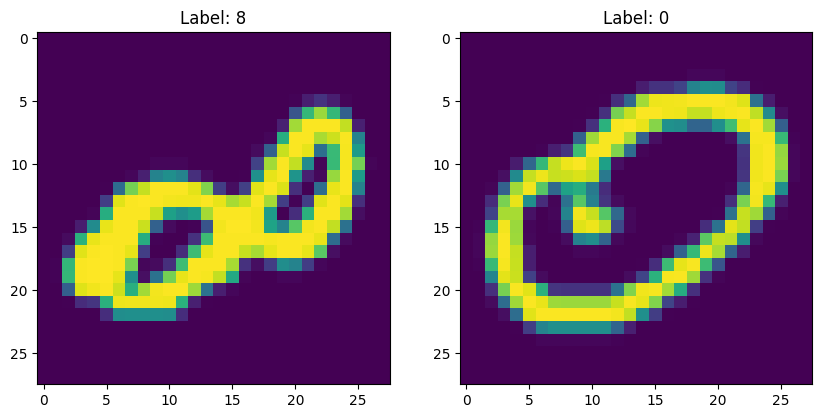

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

image_train, label_train = mnest_train[0]
image_train2, label_train2 = mnest_train[1]
image_train3, label_train3 = mnest_train[2]
print("len of mnest train:", len(mnest_train))

ax[0].imshow(image_train)
ax[0].set_title('Label: {}'.format(label_train))


image_test, label_test = mnest_test[0]

print("len of mnest test:", len(mnest_test))

ax[1].imshow(image_test)
ax[1].set_title('Label: {}'.format(label_test))
img = np.array(image_train)
print("image_train.shape:", img.shape)


torch.Size([1, 3, 28, 28])


Text(0.5, 1.0, 'Upscale + Gaussian Low Pass')

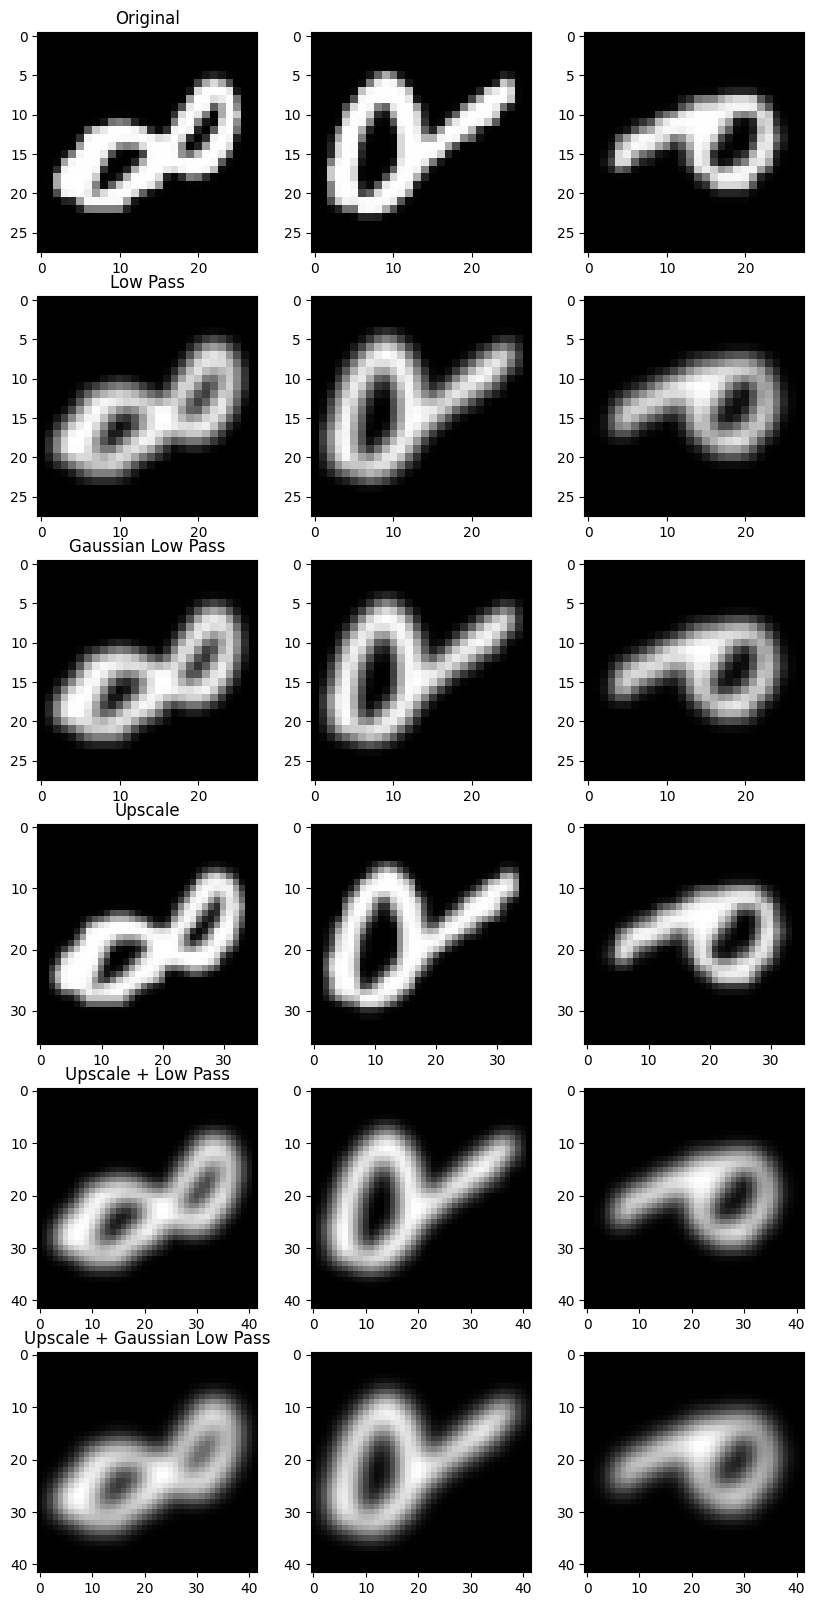

In [7]:
from models.generators import *

scale = 1.5
lp = LowPassFilter(3)
glp = GaussianFilter(3, 1)
up = Upscale(1.3)

up_lp = Upscale(scale, lp)
up_glp = Upscale(scale, glp)


tensor1 = torch.tensor(np.array(image_train)).float()
tensor2 = torch.tensor(np.array(image_train2)).float()
tensor3 = torch.tensor(np.array(image_train3)).float()

tensor = torch.stack([tensor1, tensor2, tensor3], dim=0).unsqueeze(0)

print(tensor.shape)
lp_img = lp(tensor.clone())
glp_img = glp(tensor.clone())

img = tensor.squeeze().detach().numpy().squeeze()

fig, ax = plt.subplots(6, 3, figsize=(10, 20))
for i, c in enumerate(img):
    ax[0, i].imshow(c, cmap="gray")
ax[0, 0].set_title("Original")

for i, c in enumerate(lp_img.squeeze().detach().numpy().squeeze()):
    ax[1, i].imshow(c, cmap="gray")
ax[1, 0].set_title("Low Pass")

for i, c in enumerate(glp_img.squeeze().detach().numpy().squeeze()):
    ax[2, i].imshow(c, cmap="gray")
ax[2, 0].set_title("Gaussian Low Pass")


for i, c in enumerate(up(tensor).squeeze().detach().numpy().squeeze()):
    ax[3, i].imshow(c, cmap="gray")
ax[3, 0].set_title("Upscale")

for i, c in enumerate(up_lp(tensor).squeeze().detach().numpy().squeeze()):
    ax[4, i].imshow(c, cmap="gray")
ax[4, 0].set_title("Upscale + Low Pass")

for i, c in enumerate(up_glp(tensor).squeeze().detach().numpy().squeeze()):
    ax[5, i].imshow(c, cmap="gray")
ax[5, 0].set_title("Upscale + Gaussian Low Pass")




In [8]:
print(glp.conv.weight.data)

tensor([[[[0.0751, 0.1238, 0.0751],
          [0.1238, 0.2042, 0.1238],
          [0.0751, 0.1238, 0.0751]]]])
